# Machine Learning

### The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now I will load the "Indicators" file.

In [2]:
# Loading the file into a dataframe called indicators
indicators = pd.read_csv('Indicators.csv', index_col=[0, 1])

In [3]:
# Checking the dataframe head
indicators.head()

Return on Assets  Return on Equity  Profit Margin  Current Ratio  \
Year Stock                                                                     
2014 PG             0.080705            0.1664          0.156       0.937467   
     KR             0.051877            0.2821          0.015       0.824848   
     RAD            0.035913           -0.1180          0.008       1.708956   
     GIS            0.078822            0.2792          0.102       0.810086   
     PM             0.212948           -0.5933          0.094       1.024616   

            Quick Ratio  Cash Ratio  Debt Ratio  Debt to Equity Ratio  \
Year Stock                                                              
2014 PG        0.506197    0.253751      0.2455                0.5061   
     KR        0.141709    0.037459      0.3863                2.1007   
     RAD       0.436885    0.058388      0.8290               -2.7237   
     GIS       0.433465    0.159915      0.3796                1.3445   
     PM        0.447922    0.111302      0.8371               -2.3323   

            Interest Coverage  Cash Flow to Debt Ratio  ...  \
Year Stock                                              ...   
2014 PG               21.4429                 0.394105  ...   
     KR                6.1242                 0.315915  ...   
     RAD               1.5893                 0.121943  ...   
     GIS               9.9540                 0.289217  ...   
     PM               11.0665                 0.262740  ...   

            Price Earnings to Growth Ratio  Price to Sales Ratio  \
Year Stock                                                         
2014 PG                         505.568733                2.8583   
     KR                         208.923611                0.1858   
     RAD                         31.208356                0.2491   
     GIS                       1335.957143                1.8610   
     PM                        -179.929548                1.5798   

            Dividend Yield  Dividend Payout Ratio  Asset Turnover Ratio  \
Year Stock                                                                
2014 PG             0.0311              -0.593576              0.515721   
     KR             0.0174              -0.210007              3.359687   
     RAD            0.0000               0.000000              3.675578   
     GIS            0.0286              -0.538972              0.773777   
     PM             0.0476              -0.805418              2.276579   

            Inventory Turnover Ratio  Receivables Turnover  PRICE VAR [%]  \
Year Stock                                                                  
2014 PG                      10.8869               11.5404      -9.323276   
     KR                      18.2227               90.7937      33.118297   
     RAD                      8.3030               27.1769       2.752291   
     GIS                     11.5363               12.2250      12.897715   
     PM                       8.6892               20.3910      13.980937   

                        Sector Class  
Year Stock                            
2014 PG     Consumer Defensive     0  
     KR     Consumer Defensive     1  
     RAD    Consumer Defensive     1  
     GIS    Consumer Defensive     1  
     PM     Consumer Defensive     1  

[5 rows x 21 columns]

In [4]:
# Checking the data types of the values in each individual feature
indicators.dtypes

Return on Assets                  float64
Return on Equity                  float64
Profit Margin                     float64
Current Ratio                     float64
Quick Ratio                       float64
Cash Ratio                        float64
Debt Ratio                        float64
Debt to Equity Ratio              float64
Interest Coverage                 float64
Cash Flow to Debt Ratio           float64
Price Earnings Ratio              float64
Price Earnings to Growth Ratio    float64
Price to Sales Ratio              float64
Dividend Yield                    float64
Dividend Payout Ratio             float64
Asset Turnover Ratio              float64
Inventory Turnover Ratio          float64
Receivables Turnover              float64
PRICE VAR [%]                     float64
Sector                             object
Class                               int64
dtype: object

In order for the machine learning algorithm to be able to make sense of the dataset, all the values whithin the dataset must be transformed into numerical values.  The only feature that that contains categorical values is the sector feature.  To transform the values of said feature into numerical, I will use the pandas get_dummies function which will make the values into new features with binary values where 1 where the new feature applies and a 0 where it doesn't.

The new dataset will also be saved as a new variable.

In [5]:
# Transforming all of the non numerical data types into binary that represents the existence (1) 
# or absence (0) of that feature value for each stock
df = pd.get_dummies(indicators)

In [6]:
# Checking the newly created dataframe with the 'dummy' values
df.head()

Return on Assets  Return on Equity  Profit Margin  Current Ratio  \
Year Stock                                                                     
2014 PG             0.080705            0.1664          0.156       0.937467   
     KR             0.051877            0.2821          0.015       0.824848   
     RAD            0.035913           -0.1180          0.008       1.708956   
     GIS            0.078822            0.2792          0.102       0.810086   
     PM             0.212948           -0.5933          0.094       1.024616   

            Quick Ratio  Cash Ratio  Debt Ratio  Debt to Equity Ratio  \
Year Stock                                                              
2014 PG        0.506197    0.253751      0.2455                0.5061   
     KR        0.141709    0.037459      0.3863                2.1007   
     RAD       0.436885    0.058388      0.8290               -2.7237   
     GIS       0.433465    0.159915      0.3796                1.3445   
     PM        0.447922    0.111302      0.8371               -2.3323   

            Interest Coverage  Cash Flow to Debt Ratio  ...  \
Year Stock                                              ...   
2014 PG               21.4429                 0.394105  ...   
     KR                6.1242                 0.315915  ...   
     RAD               1.5893                 0.121943  ...   
     GIS               9.9540                 0.289217  ...   
     PM               11.0665                 0.262740  ...   

            Sector_Communication Services  Sector_Consumer Cyclical  \
Year Stock                                                            
2014 PG                                 0                         0   
     KR                                 0                         0   
     RAD                                0                         0   
     GIS                                0                         0   
     PM                                 0                         0   

            Sector_Consumer Defensive  Sector_Energy  \
Year Stock                                             
2014 PG                             1              0   
     KR                             1              0   
     RAD                            1              0   
     GIS                            1              0   
     PM                             1              0   

            Sector_Financial Services  Sector_Healthcare  Sector_Industrials  \
Year Stock                                                                     
2014 PG                             0                  0                   0   
     KR                             0                  0                   0   
     RAD                            0                  0                   0   
     GIS                            0                  0                   0   
     PM                             0                  0                   0   

            Sector_Real Estate  Sector_Technology  Sector_Utilities  
Year Stock                                                           
2014 PG                      0                  0                 0  
     KR                      0                  0                 0  
     RAD                     0                  0                 0  
     GIS                     0                  0                 0  
     PM                      0                  0                 0  

[5 rows x 31 columns]

The new dataset now contains new features which are subsets of the Sector feature.  Because of the, the amount of features (columns) went from 21 to 31.

Now the dataset is ready for the machine learning process.  The goal of the project is to create a machine learning algorithm that will identify whether it is recommended to invest in a stock (1) or whether it should be declined (0).  The class feature of the dataset is what identifies the recommendation so it will become the y (label) variable.  The remaining features will be the X variables.

## Classification

### Random Forest

The first algorithm I will use to create a predictive classification model will be the random forest algorithm.  For this model I will use the class as the label and the features up to, but not including, price variance as the predicting variables.

The next step is to separate the X and the y variables.

In [7]:
X = df.drop(['Class', 'PRICE VAR [%]'], axis = 1) # Features
y = df.Class # Label

Since the dataset contains a binary label variable, the type of machine learning algorythm will will be a supervised classification algorythm.

The next step will be to split both variables into training and testing variables.

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [9]:
# Splitting the dataset into 70% training and 30% testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

I will use GridSearchCV in order to find the best parameters to apply for the model.  Ideally all parameters would be tested, but due to limited computing power I have chosen a few select one.  The number of estimators, the maximum number of features and the maximum depth.

I will begin by setting the parameters for the cross validation tests, but first I will import the needed library.

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
n_estimators = np.arange(50, 201, 50) # Number of trees to be used in the random forest.
max_features = np.arange(1, 11) # Maximum number of features to be used by each tree in the random forest.
max_depth = np.arange(1, 11) # Maximum number of nodes for each tree in the random forest.

In [12]:
# Creating a dictionary of the parameters grid to be used in the grid search to be cross validated.
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth}

Since this project seeks to predict stock which to buy, recall and accuracy scores are important and must be taken into consideration, but the precision score will be highlighted in the refit parameter because in order to improve said score, GridSearchCV will work to reduce the amount of false positives, which in this case are the stocks misclassified as invest (1) when they should not.

In [13]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix

In [14]:
scorers = {'accuracy_score':make_scorer(accuracy_score),
          'precision_score':make_scorer(precision_score),
          'recall_score':make_scorer(recall_score)}

In [15]:
# Declare the variable with the Random Forest Classifier model
rfc = RandomForestClassifier()

# Declare the grid with the estimator/model and the parameter grid to be used
grid = GridSearchCV(rfc, param_grid, scoring = scorers, refit = 'precision_score')

In [16]:
# Fit the grid with the train features and train labels
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 50, 100, 150, 200])},
             refit='precision_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [17]:
# Check the best parameters combination to use for the Random Forest Classifier
grid.best_params_

{'max_depth': 10, 'max_features': 7, 'n_estimators': 50}

In [18]:
best_params = grid.best_params_

max_depth = best_params['max_depth']
max_features = best_params['max_features']
n_estimators = best_params['n_estimators']

In [19]:
# Build the Random Forest Classifier with the parameters acquired from the GridSearchCV
rfc = RandomForestClassifier(max_depth = max_depth,
                             max_features = max_features,
                             n_estimators = n_estimators, 
                             random_state = 42)

# Fit the train date into the new Random Forest Classifier model
rfc.fit(X_train, y_train)

# Save the prediction of the model to analyze the results
y_pred = rfc.predict(X_test)

In [20]:
# Check the accuracy score of the new model
rfc_precision_score = precision_score(y_test, y_pred)
rfc_precision_score

0.618805002315887

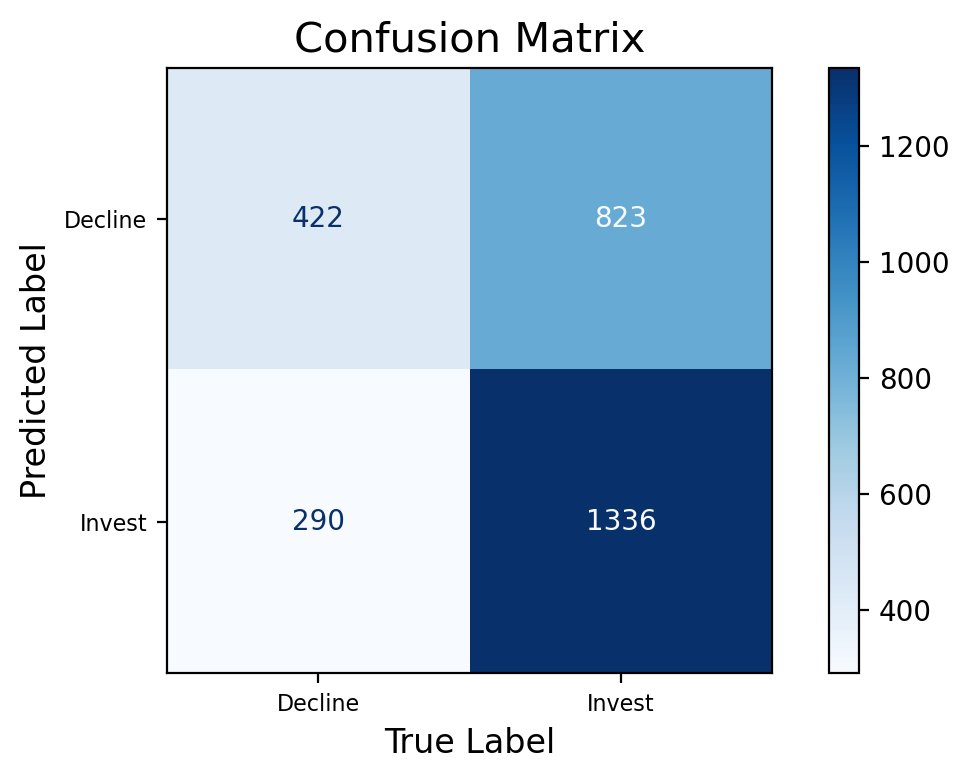

In [21]:
# Plot the confusion matrix to check on accuracy

fig, ax = plt.subplots(figsize = (6,4), dpi = 200)

plot_confusion_matrix(rfc, X_test, y_test, ax = ax, cmap = 'Blues', )

ax.set_xticklabels(['Decline', 'Invest'], fontsize = 8)
ax.set_yticklabels(['Decline', 'Invest'], fontsize = 8)

plt.xlabel('True Label', fontsize = 12)
plt.ylabel('Predicted Label', fontsize = 12)

plt.title("Confusion Matrix", size = 15)

plt.tight_layout()

plt.show()

In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.34      0.43      1245
           1       0.62      0.82      0.71      1626

    accuracy                           0.61      2871
   macro avg       0.61      0.58      0.57      2871
weighted avg       0.61      0.61      0.59      2871



The accuracy score indicates what can be seen in the confusion matrix.  An accuracy score of 1.0 demonstrate that the random forest model was 100% accurate.  What that means is that the model was able to correctly classify the test data in both the true decline column and the true invest column.

I will now check and see how each feature contributed to the model.

In [24]:
feature_importance = rfc.feature_importances_ # Isolates the features numerical importance of the features
sorted_idx = np.argsort(feature_importance) # Sorts the indexes of the features according to importance
pos = np.arange(sorted_idx.shape[0]) + 0.5 # Creates an array slightly bigger than the amount of features

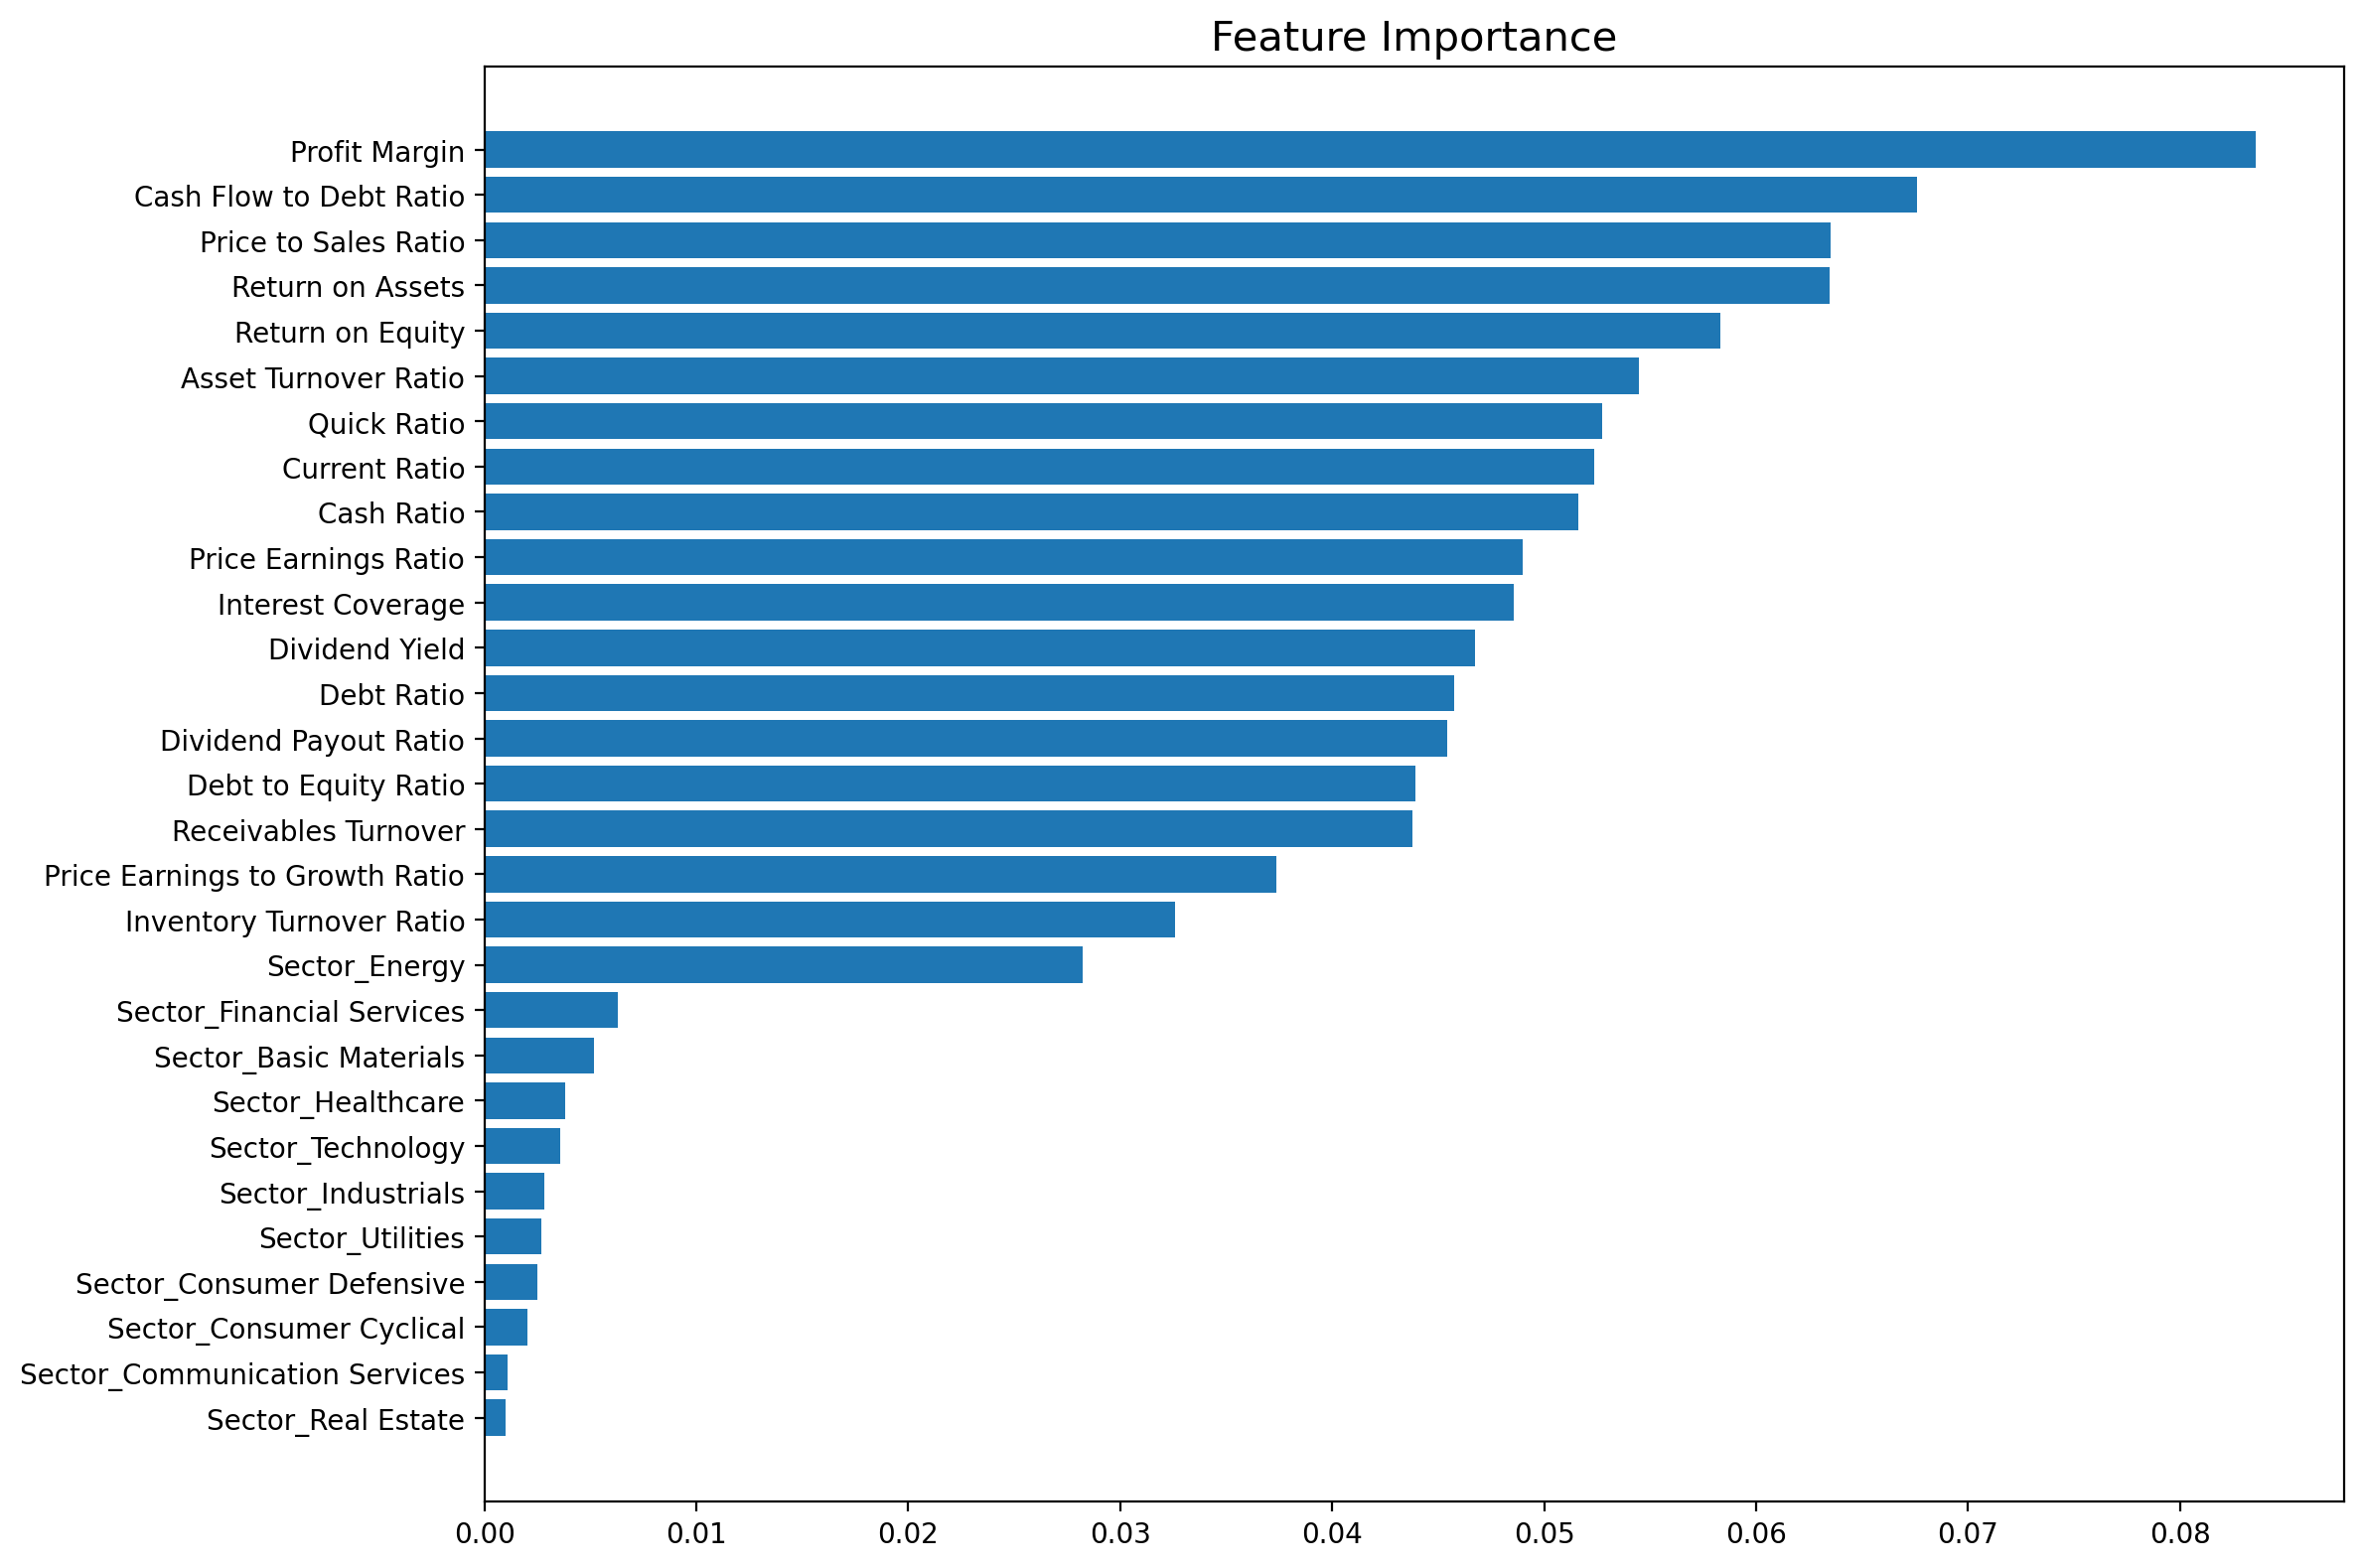

In [25]:
plt.figure(figsize = (12, 8), dpi = 200)
plt.barh(pos, feature_importance[sorted_idx], align = 'center', )
plt.yticks(pos, X.columns[sorted_idx])

plt.title("Feature Importance", size = 15)

plt.tight_layout()

plt.show()

The profit margin is the features that has the biggest influence in the model while the sector features make the least impact.

### Random Forest with Transformed Data

I will now transform the features, except for the sector features, to see if they can make more of an impact in the model and improve the accuracy score.

In [26]:
from sklearn.preprocessing import PowerTransformer

In [27]:
# Create the transforming functions.

log = PowerTransformer()

In [28]:
# Create new names for the transformed columns

log_col = []

for col in indicators.iloc[:,0:18].columns:
    log_col.append("Log " + col)

In [29]:
# Fit the log function to the data.

log.fit(indicators.iloc[:,0:18])

# Add the transformed columns to the X variables.

X[log_col] = log.transform(indicators.iloc[:,0:18])

# Checking the newly created X
X.head()

Return on Assets  Return on Equity  Profit Margin  Current Ratio  \
Year Stock                                                                     
2014 PG             0.080705            0.1664          0.156       0.937467   
     KR             0.051877            0.2821          0.015       0.824848   
     RAD            0.035913           -0.1180          0.008       1.708956   
     GIS            0.078822            0.2792          0.102       0.810086   
     PM             0.212948           -0.5933          0.094       1.024616   

            Quick Ratio  Cash Ratio  Debt Ratio  Debt to Equity Ratio  \
Year Stock                                                              
2014 PG        0.506197    0.253751      0.2455                0.5061   
     KR        0.141709    0.037459      0.3863                2.1007   
     RAD       0.436885    0.058388      0.8290               -2.7237   
     GIS       0.433465    0.159915      0.3796                1.3445   
     PM        0.447922    0.111302      0.8371               -2.3323   

            Interest Coverage  Cash Flow to Debt Ratio  ...  \
Year Stock                                              ...   
2014 PG               21.4429                 0.394105  ...   
     KR                6.1242                 0.315915  ...   
     RAD               1.5893                 0.121943  ...   
     GIS               9.9540                 0.289217  ...   
     PM               11.0665                 0.262740  ...   

            Log Interest Coverage  Log Cash Flow to Debt Ratio  \
Year Stock                                                       
2014 PG                  0.030471                     0.007423   
     KR                 -0.000954                     0.007401   
     RAD                -0.009894                     0.007344   
     GIS                 0.006776                     0.007393   
     PM                  0.009041                     0.007385   

            Log Price Earnings Ratio  Log Price Earnings to Growth Ratio  \
Year Stock                                                                 
2014 PG                     0.469259                            0.089591   
     KR                     0.199323                            0.043098   
     RAD                    0.736054                            0.013760   
     GIS                    0.467495                            0.214418   
     PM                     0.412466                           -0.036063   

            Log Price to Sales Ratio  Log Dividend Yield  \
Year Stock                                                 
2014 PG                     0.476053            1.072286   
     KR                    -1.584967            0.452270   
     RAD                   -1.462829           -0.866680   
     GIS                    0.073966            0.978729   
     PM                    -0.081465            1.532265   

            Log Dividend Payout Ratio  Log Asset Turnover Ratio  \
Year Stock                                                        
2014 PG                     -0.025863                  0.002373   
     KR                      0.007036                  2.059025   
     RAD                     0.025208                  2.133589   
     GIS                    -0.021200                  0.459319   
     PM                     -0.043902                  1.694907   

            Log Inventory Turnover Ratio  Log Receivables Turnover  
Year Stock                                                          
2014 PG                         0.671123                  0.489552  
     KR                         0.922749                  2.087100  
     RAD                        0.532584                  1.150113  
     GIS                        0.700249                  0.533389  
     PM                         0.556077                  0.926983  

[5 rows x 47 columns]

In [30]:
log_X = pd.DataFrame(log.transform(indicators.iloc[:,0:18]), columns=log_col, index = indicators.index)
log_X = log_X.merge(indicators['Sector'], left_index = True, right_index = True)

In [31]:
# Creating the dummie variablabses

log_X = pd.get_dummies(log_X)

In order to keep the training model from seeing the testing data, the standardization of the data must be done after separating the training and testing data.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(log_X, y, test_size = 0.2, random_state = 42)

Now it is time to fit the new data to the GridSearchCV.

In [33]:
n_estimators = np.arange(50, 201, 50) # Number of trees to be used in the random forest.
max_features = np.arange(1, 11) # Maximum number of features to be used by each tree in the random forest.
max_depth = np.arange(1, 11) # Maximum number of nodes for each tree in the random forest.

In [34]:
# Creating a dictionary of the parameters grid to be used in the grid search to be cross validated.
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth}

In [35]:
# Declare the variable with the Random Forest Classifier model
rfc = RandomForestClassifier()

# Declare the grid with the estimator/model and the parameter grid to be used
grid = GridSearchCV(rfc, param_grid, scoring = scorers, refit = 'precision_score')

In [36]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 50, 100, 150, 200])},
             refit='precision_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [37]:
grid.best_params_

{'max_depth': 10, 'max_features': 9, 'n_estimators': 100}

In [38]:
best_params = grid.best_params_

max_depth = best_params['max_depth']
max_features = best_params['max_features']
n_estimators = best_params['n_estimators']

In [39]:
# Build the Random Forest Classifier with the parameters acquired from the GridSearchCV
transformed_rfc = RandomForestClassifier(max_depth = max_depth,
                             max_features = max_features, n_estimators = n_estimators, random_state = 42)

# Fit the train date into the new Random Forest Classifier model
transformed_rfc.fit(X_train, y_train)

# Save the prediction of the model to analyze the results
y_pred = transformed_rfc.predict(X_test)

In [40]:
transformed_rfc_precision_score = precision_score(y_test, y_pred)
transformed_rfc_precision_score

0.6197053406998159

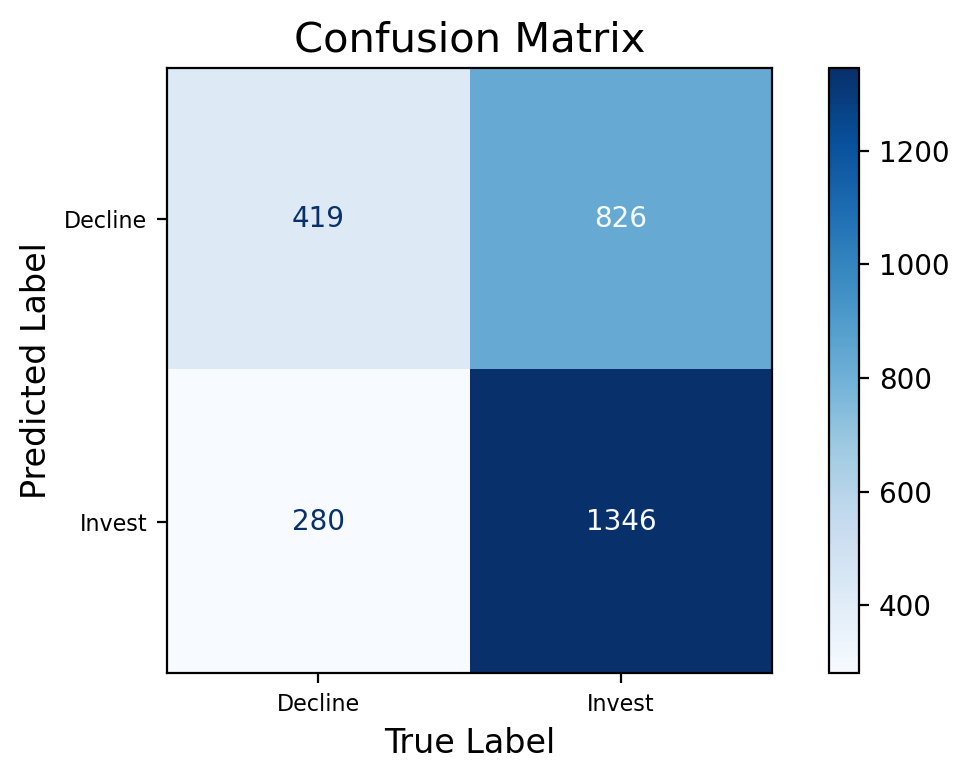

In [41]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 200)

plot_confusion_matrix(transformed_rfc, X_test, y_test, ax = ax, cmap = 'Blues')

ax.set_xticklabels(['Decline', 'Invest'], fontsize = 8)
ax.set_yticklabels(['Decline', 'Invest'], fontsize = 8)

plt.xlabel('True Label', fontsize = 12)
plt.ylabel('Predicted Label', fontsize = 12)

plt.title("Confusion Matrix", size = 15)

plt.tight_layout()

plt.show()

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.34      0.43      1245
           1       0.62      0.83      0.71      1626

    accuracy                           0.61      2871
   macro avg       0.61      0.58      0.57      2871
weighted avg       0.61      0.61      0.59      2871



In [43]:
feature_importance = transformed_rfc.feature_importances_ # Isolates the features numerical importance of the features
sorted_idx = np.argsort(feature_importance) # Sorts the indexes of the features according to importance
pos = np.arange(sorted_idx.shape[0]) + 0.5 # Creates an array slightly bigger than the amount of features

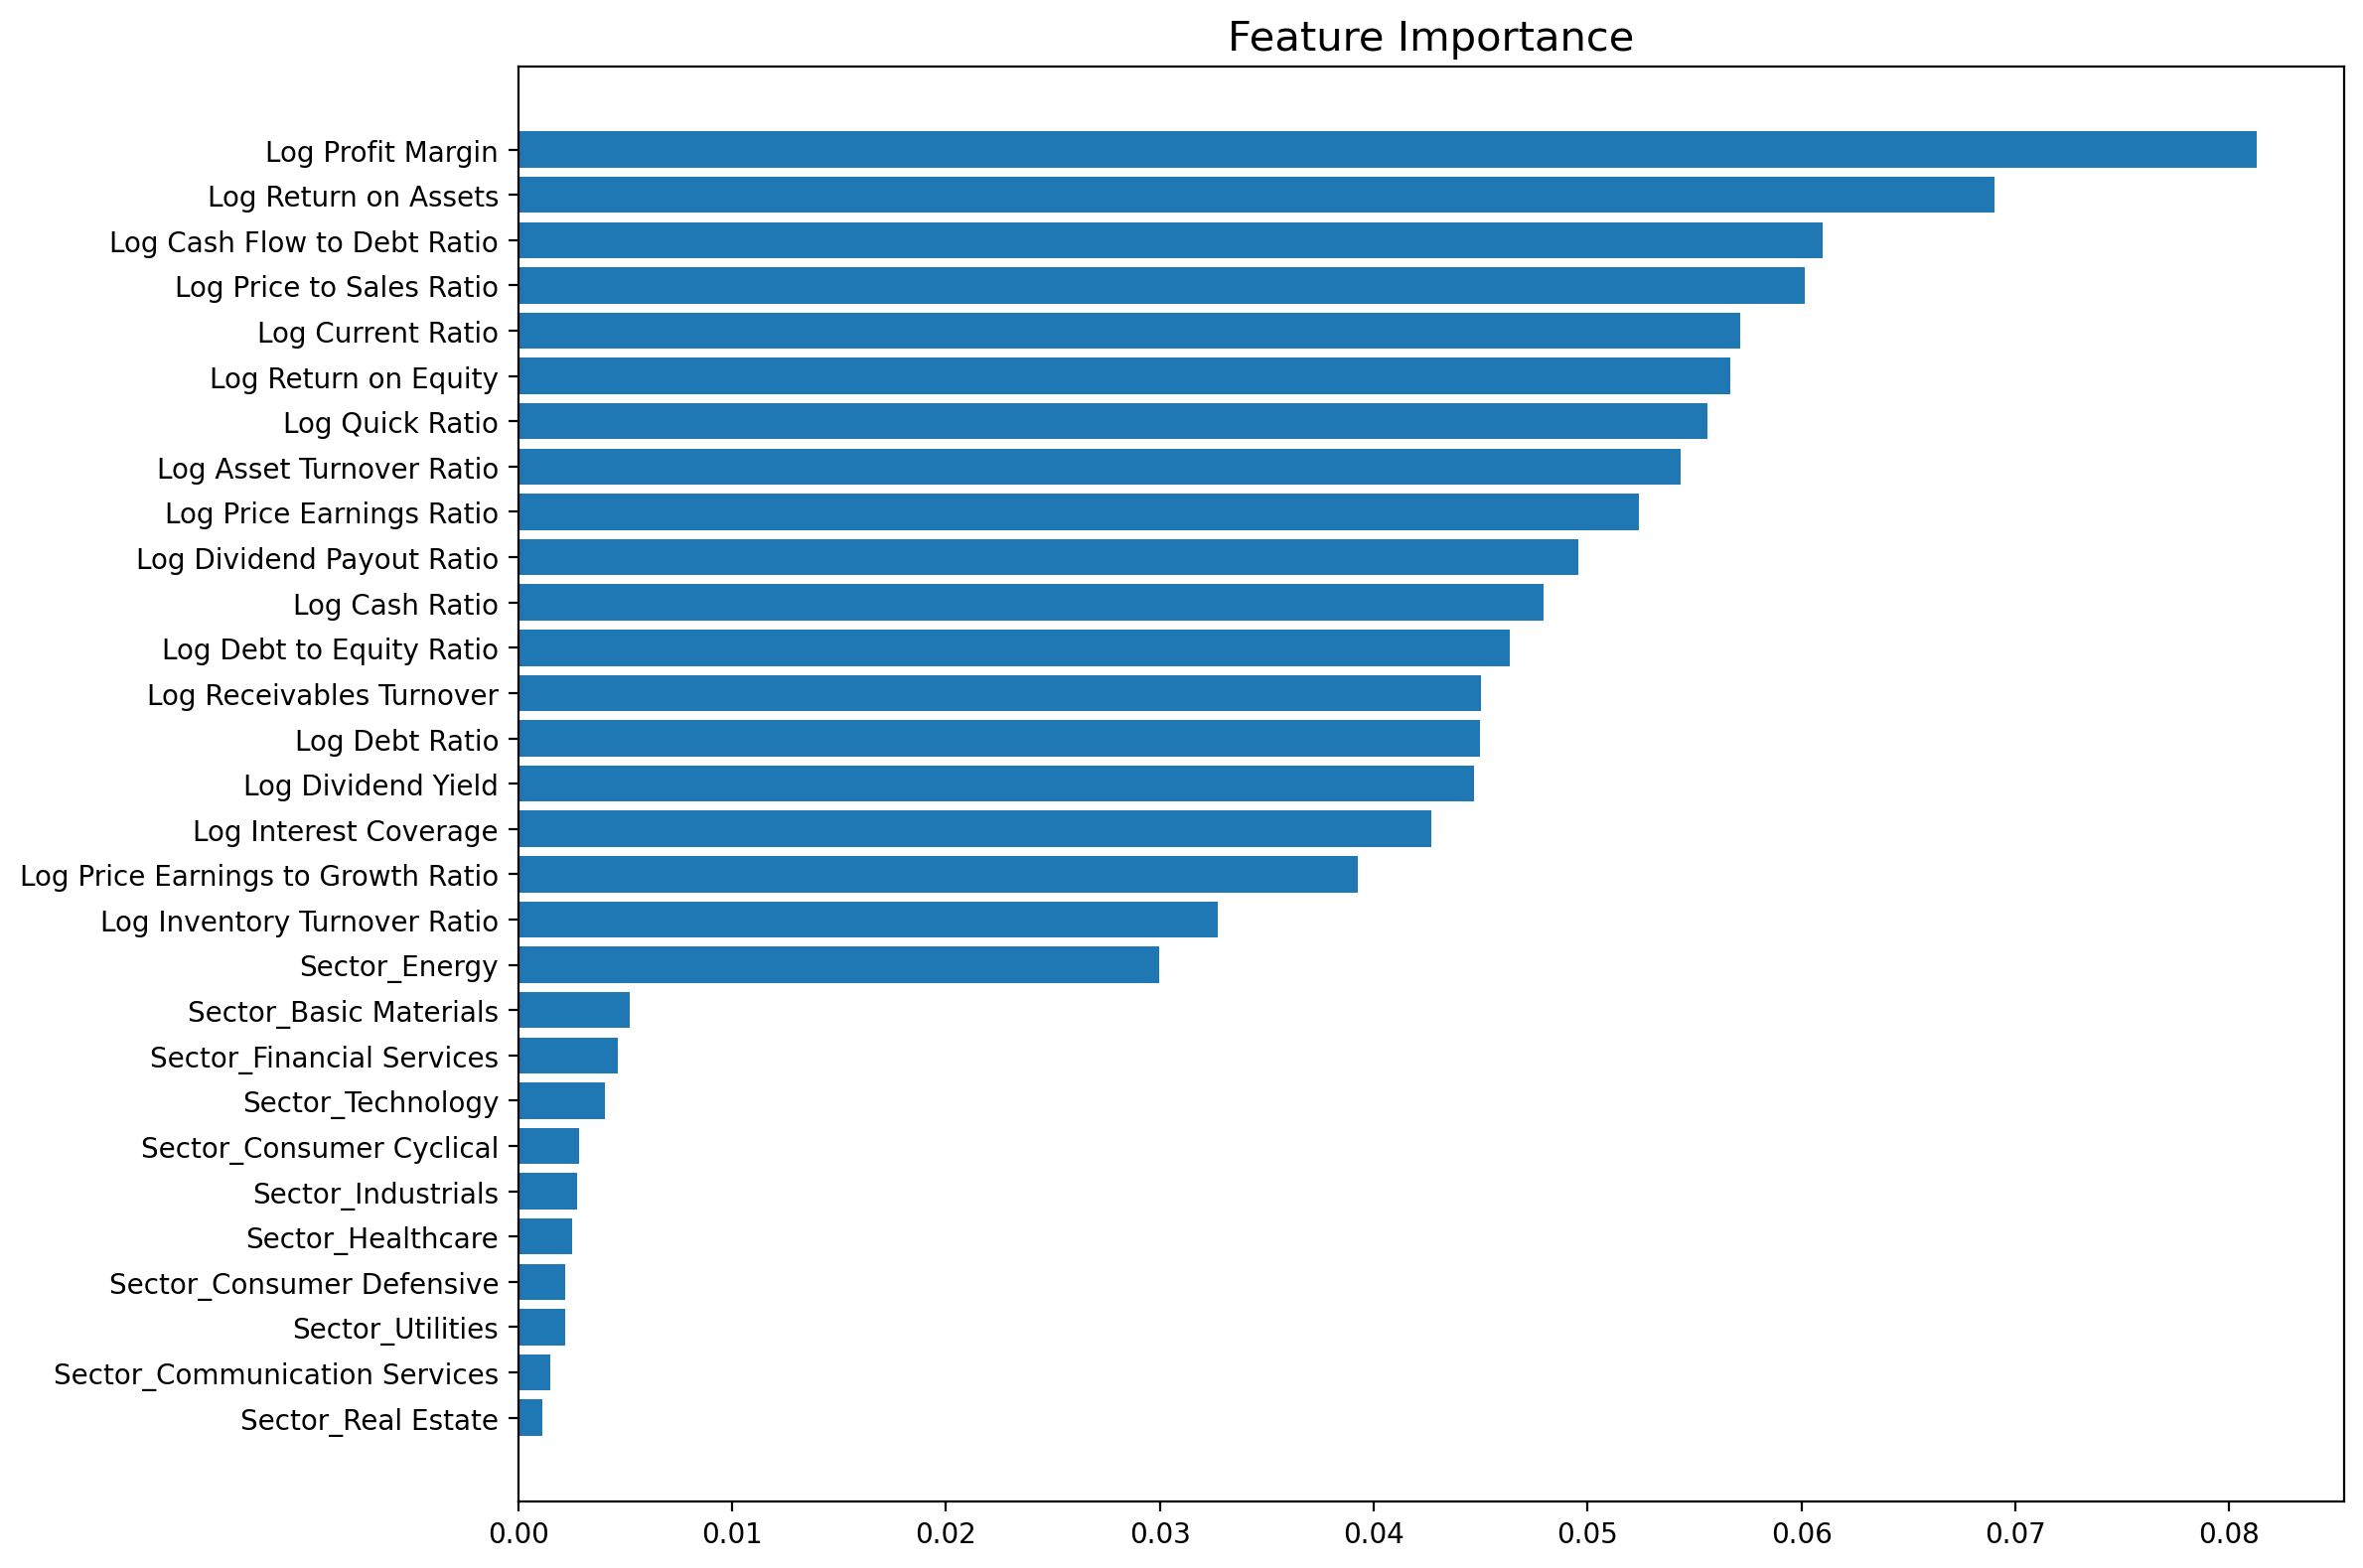

In [44]:
plt.figure(figsize = (12, 8), dpi = 200)
plt.barh(pos, feature_importance[sorted_idx], align = 'center')
plt.yticks(pos, log_X.columns[sorted_idx])

plt.title("Feature Importance", size = 15)

plt.tight_layout()

plt.show()

### Extreme Gradient Boosting

The Extreme Gradient Boosting will undergo the same process as the random forest in order to acquire the best features to utilize in the model creation.

In [45]:
n_estimators = np.arange(50, 201, 50) # Number of trees to be used in the random forest.
max_features = np.arange(1, 11) # Maximum number of features to be used by each tree in the random forest.
max_depth = np.arange(1, 11) # Maximum number of nodes for each tree in the random forest.

In [46]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth}

In [47]:
# Removing the 'Log' columns from X

X = X.iloc[:,0:29]

X.head()

Return on Assets  Return on Equity  Profit Margin  Current Ratio  \
Year Stock                                                                     
2014 PG             0.080705            0.1664          0.156       0.937467   
     KR             0.051877            0.2821          0.015       0.824848   
     RAD            0.035913           -0.1180          0.008       1.708956   
     GIS            0.078822            0.2792          0.102       0.810086   
     PM             0.212948           -0.5933          0.094       1.024616   

            Quick Ratio  Cash Ratio  Debt Ratio  Debt to Equity Ratio  \
Year Stock                                                              
2014 PG        0.506197    0.253751      0.2455                0.5061   
     KR        0.141709    0.037459      0.3863                2.1007   
     RAD       0.436885    0.058388      0.8290               -2.7237   
     GIS       0.433465    0.159915      0.3796                1.3445   
     PM        0.447922    0.111302      0.8371               -2.3323   

            Interest Coverage  Cash Flow to Debt Ratio  ...  \
Year Stock                                              ...   
2014 PG               21.4429                 0.394105  ...   
     KR                6.1242                 0.315915  ...   
     RAD               1.5893                 0.121943  ...   
     GIS               9.9540                 0.289217  ...   
     PM               11.0665                 0.262740  ...   

            Sector_Communication Services  Sector_Consumer Cyclical  \
Year Stock                                                            
2014 PG                                 0                         0   
     KR                                 0                         0   
     RAD                                0                         0   
     GIS                                0                         0   
     PM                                 0                         0   

            Sector_Consumer Defensive  Sector_Energy  \
Year Stock                                             
2014 PG                             1              0   
     KR                             1              0   
     RAD                            1              0   
     GIS                            1              0   
     PM                             1              0   

            Sector_Financial Services  Sector_Healthcare  Sector_Industrials  \
Year Stock                                                                     
2014 PG                             0                  0                   0   
     KR                             0                  0                   0   
     RAD                            0                  0                   0   
     GIS                            0                  0                   0   
     PM                             0                  0                   0   

            Sector_Real Estate  Sector_Technology  Sector_Utilities  
Year Stock                                                           
2014 PG                      0                  0                 0  
     KR                      0                  0                 0  
     RAD                     0                  0                 0  
     GIS                     0                  0                 0  
     PM                      0                  0                 0  

[5 rows x 29 columns]

In [76]:
# Resetting the testing and the training data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
from xgboost import XGBClassifier

In [77]:
# Declare the variable with the Extreme Gradient Boosting Classifier model
xgb = XGBClassifier()

# Declare the grid with the estimator/model and the parameter grid to be used
grid = GridSearchCV(xgb, param_grid, scoring = scorers, refit = 'precision_score')

In [78]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 50, 100, 150, 200])},
             refit='precision_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [79]:
grid.best_params_

{'max_depth': 8, 'max_features': 1, 'n_estimators': 200}

In [80]:
best_params = grid.best_params_

max_depth = best_params['max_depth']
max_features = best_params['max_features']
n_estimators = best_params['n_estimators']

In [81]:
xgb = XGBClassifier(max_depth = max_depth, max_features = max_features, n_estimators = n_estimators)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

In [82]:
# Check the accuracy score of the new model
xgb_precision_score = precision_score(y_test, y_pred)
xgb_precision_score

0.6259338313767343

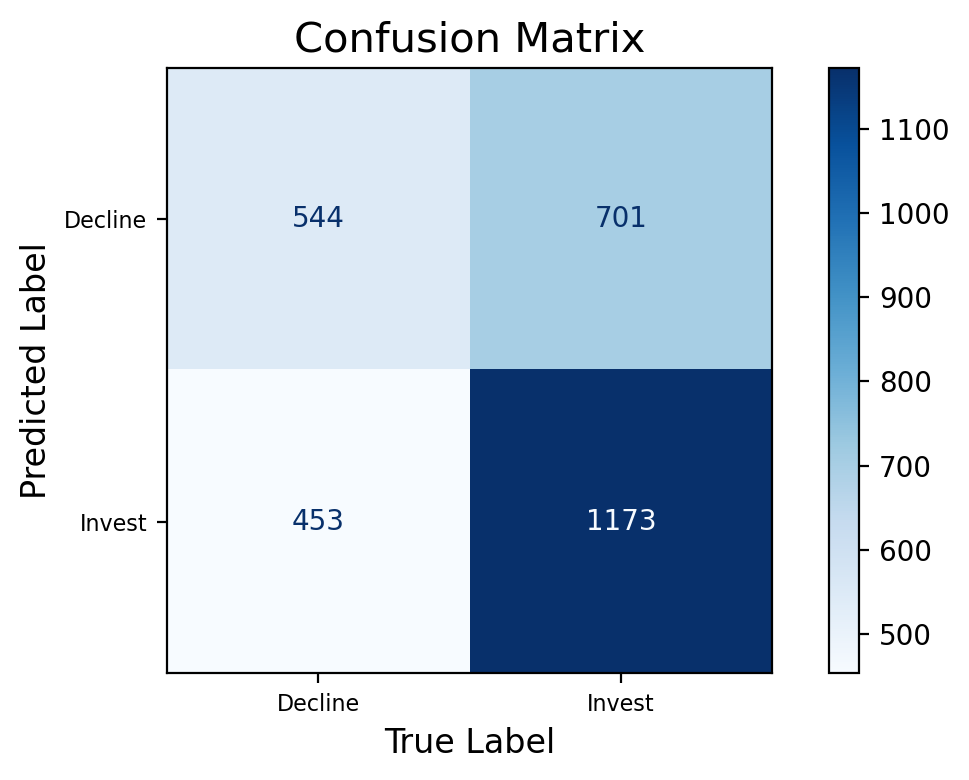

In [83]:
# Plot the confusion matrix to check on accuracy

fig, ax = plt.subplots(figsize = (6,4), dpi = 200)

plot_confusion_matrix(xgb, X_test, y_test, ax = ax, cmap = 'Blues')

ax.set_xticklabels(['Decline', 'Invest'], fontsize = 8)
ax.set_yticklabels(['Decline', 'Invest'], fontsize = 8)

plt.xlabel('True Label', fontsize = 12)
plt.ylabel('Predicted Label', fontsize = 12)

plt.title("Confusion Matrix", size = 15)

plt.tight_layout()

plt.show()

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.44      0.49      1245
           1       0.63      0.72      0.67      1626

    accuracy                           0.60      2871
   macro avg       0.59      0.58      0.58      2871
weighted avg       0.59      0.60      0.59      2871



In [85]:
feature_importance = xgb.feature_importances_ # Isolates the features numerical importance of the features
sorted_idx = np.argsort(feature_importance) # Sorts the indexes of the features according to importance
pos = np.arange(sorted_idx.shape[0]) + 0.5 # Creates an array slightly bigger than the amount of features

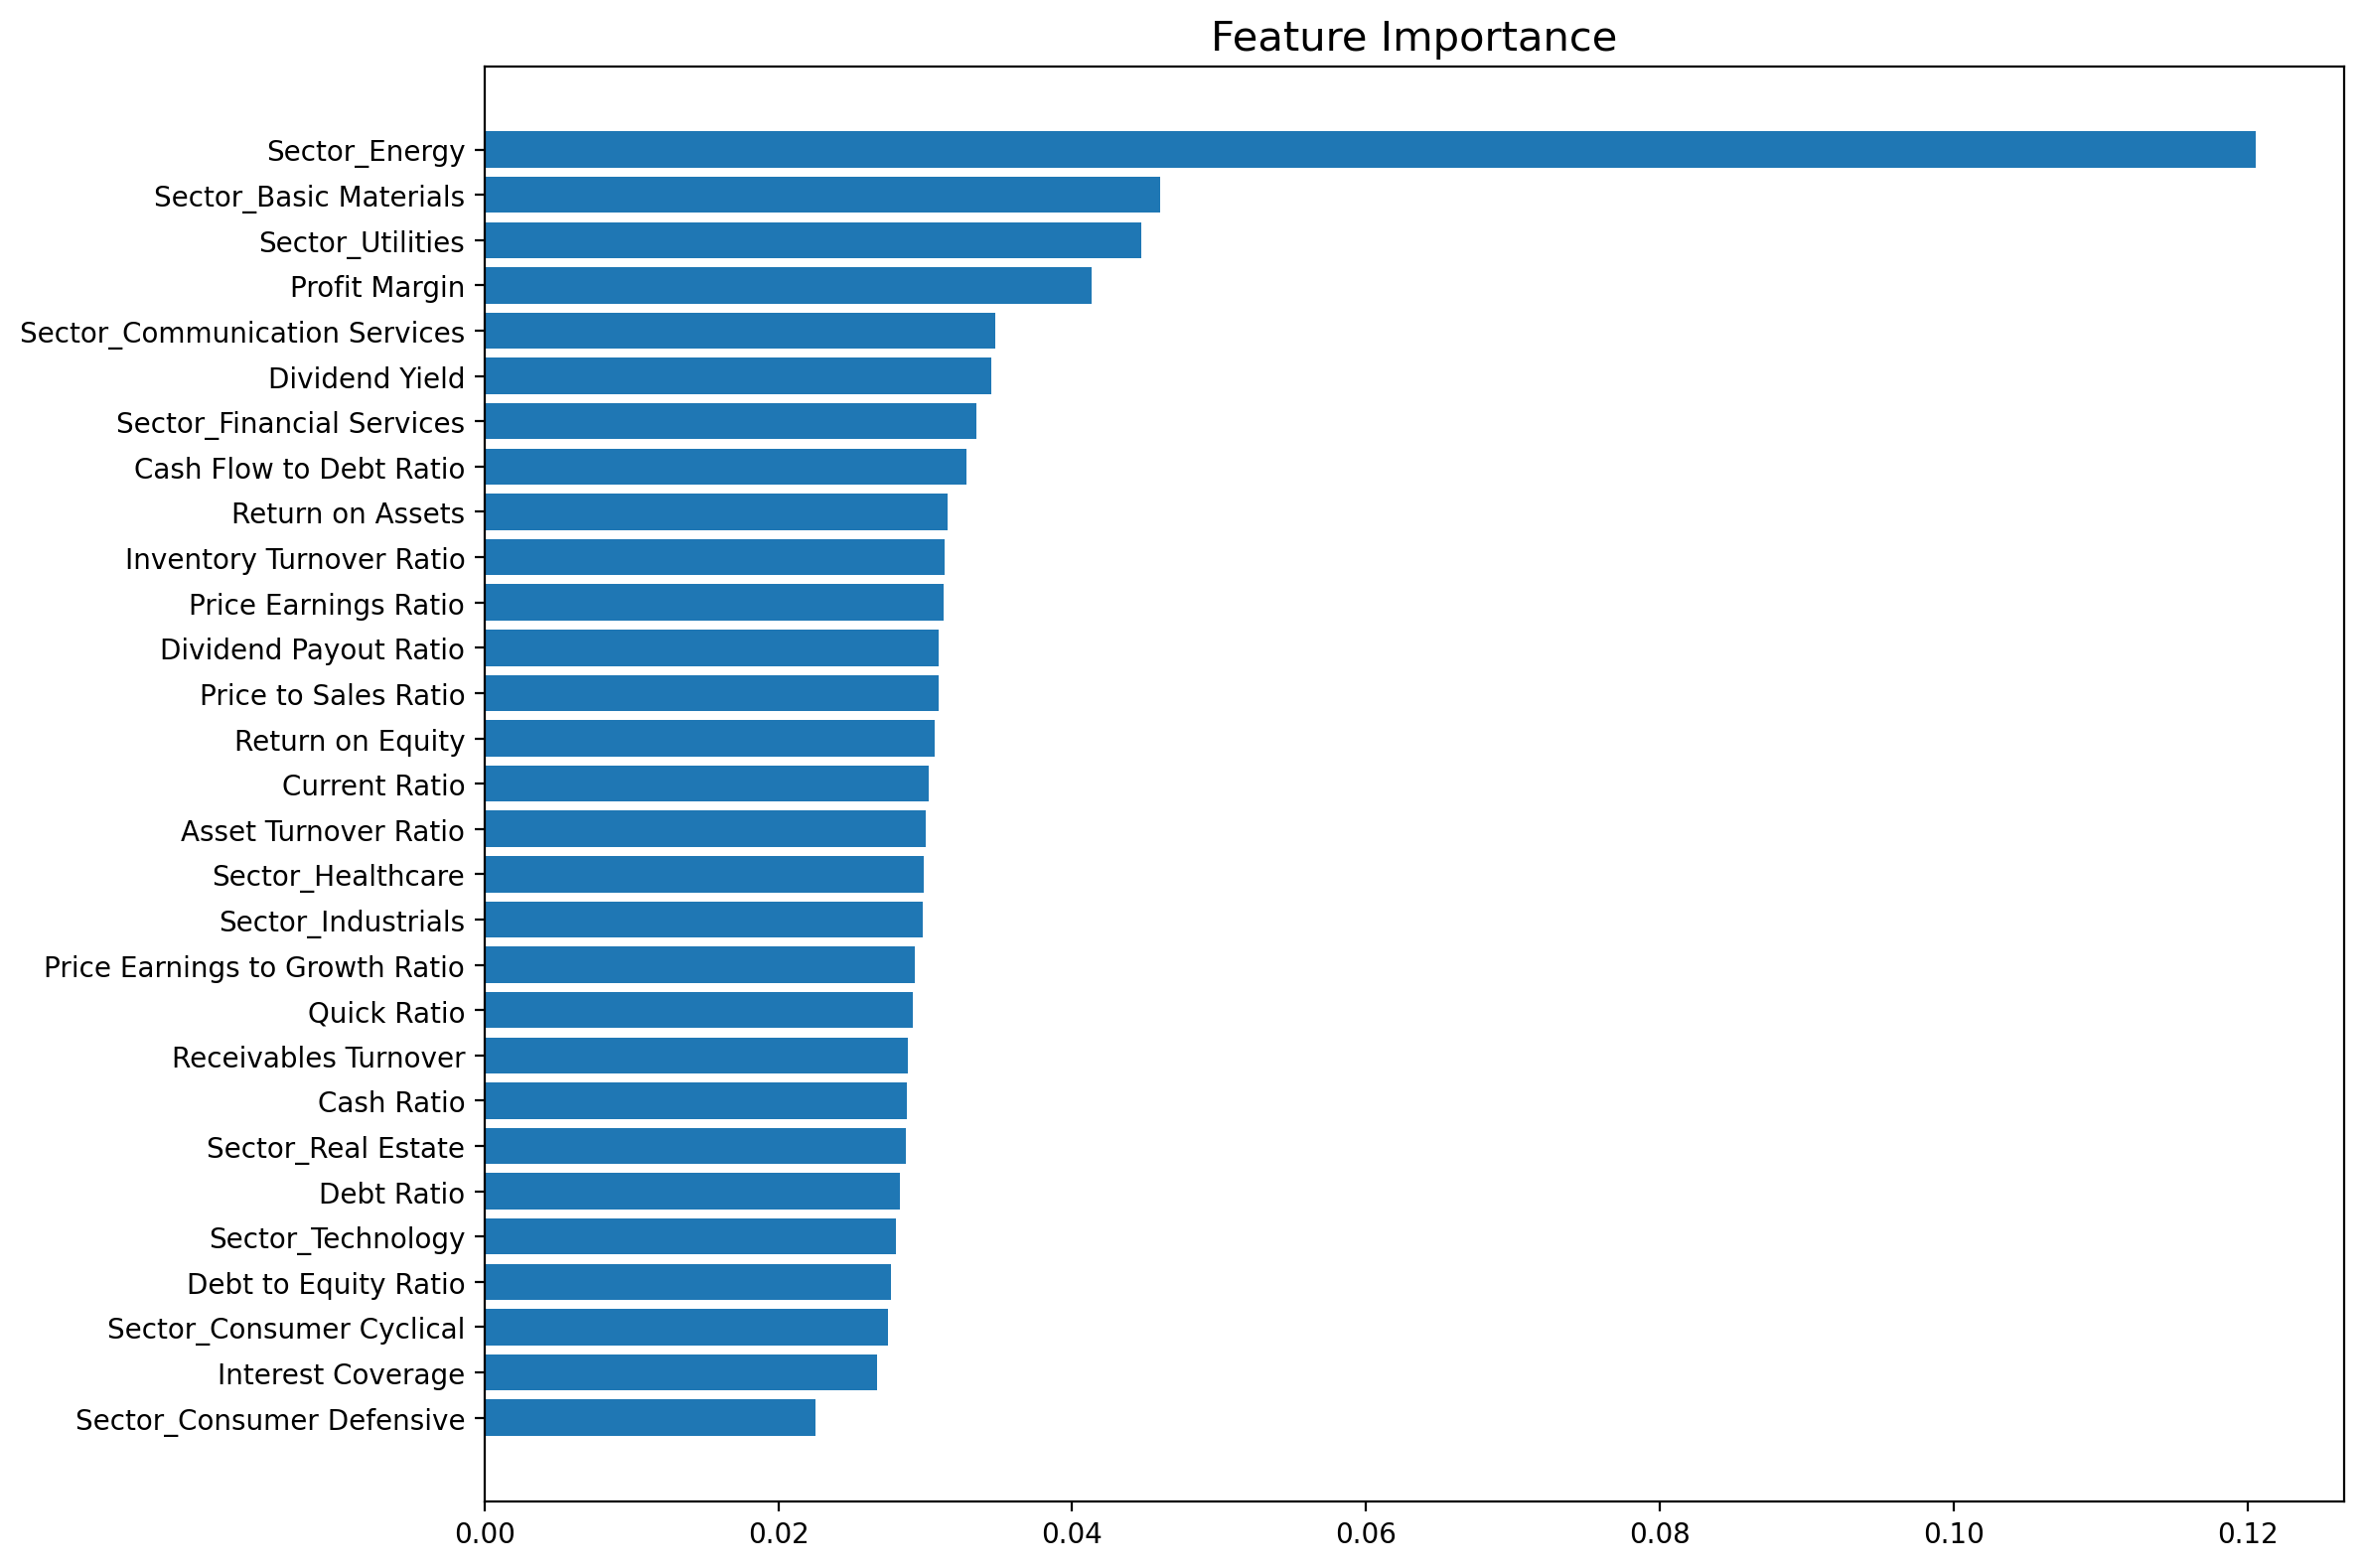

In [86]:
plt.figure(figsize = (12, 8), dpi = 200)
plt.barh(pos, feature_importance[sorted_idx], align = 'center')
plt.yticks(pos, X.columns[sorted_idx])

plt.title("Feature Importance", size = 15)

plt.tight_layout()

plt.show()

### Transformed Extreme Gradient Boosting

Now it is time to check how the extreme gradient boosting will do with the transformed data.

In [59]:
n_estimators = np.arange(50, 201, 50) # Number of trees to be used in the random forest.
max_features = np.arange(1, 11) # Maximum number of features to be used by each tree in the random forest.
max_depth = np.arange(1, 11) # Maximum number of nodes for each tree in the random forest.

In [60]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth}

In [61]:
# Declare the variable with the Extreme Gradient Boosting Classifier model
transformed_xgb = XGBClassifier()

# Declare the grid with the estimator/model and the parameter grid to be used
grid = GridSearchCV(transformed_xgb, param_grid, scoring = scorers, refit = 'precision_score')

In [62]:
X_train, X_test, y_train, y_test = train_test_split(log_X, y, test_size = 0.2, random_state = 42)

In [63]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': array([ 50, 100, 150, 200])},
             refit='precision_score',
             scoring={'accuracy_score': make_scorer(accuracy_score),
                      'precision_score': make_scorer(precision_score),
                      'recall_score': make_scorer(recall_score)})

In [64]:
grid.best_params_

{'max_depth': 8, 'max_features': 1, 'n_estimators': 100}

In [65]:
best_params = grid.best_params_

max_depth = best_params['max_depth']
max_features = best_params['max_features']
n_estimators = best_params['n_estimators']

In [66]:
transformed_xgb = XGBClassifier(max_depth = max_depth, max_features = max_features, n_estimators = n_estimators)
transformed_xgb.fit(X_train, y_train)

y_pred = transformed_xgb.predict(X_test)

In [67]:
# Check the accuracy score of the new model
transformed_xgb_precision_score = precision_score(y_test, y_pred)
transformed_xgb_precision_score

0.6200204290091931

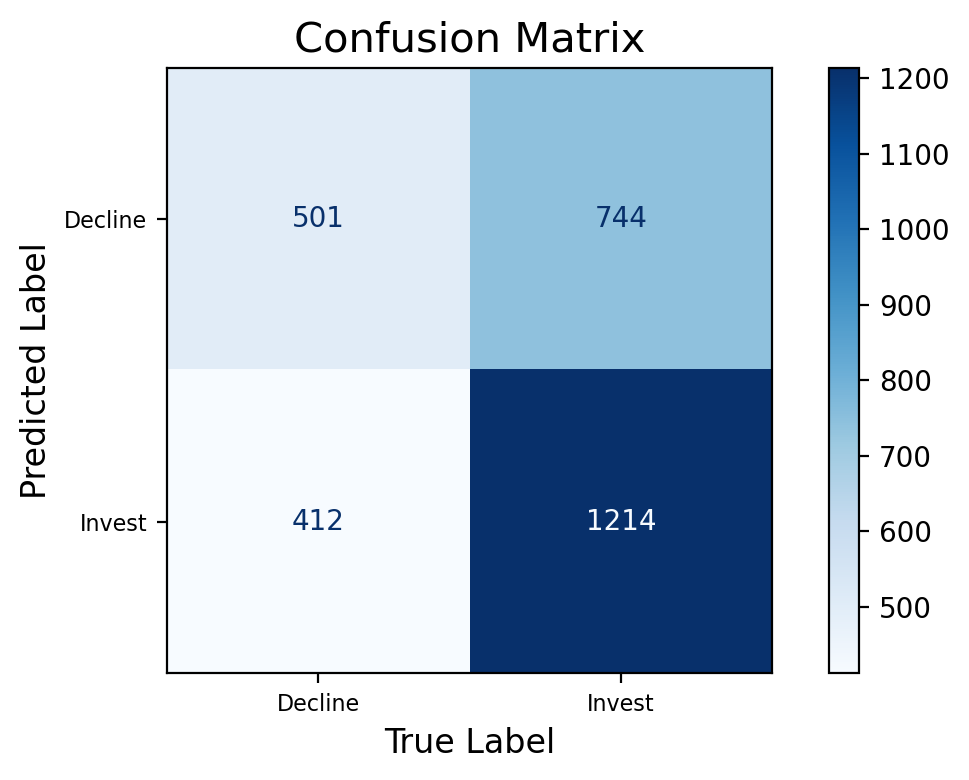

In [68]:
# Plot the confusion matrix to check on accuracy

fig, ax = plt.subplots(figsize = (6,4), dpi = 200)

plot_confusion_matrix(transformed_xgb, X_test, y_test, ax = ax, cmap = 'Blues')

ax.set_xticklabels(['Decline', 'Invest'], fontsize = 8)
ax.set_yticklabels(['Decline', 'Invest'], fontsize = 8)

plt.xlabel('True Label', fontsize = 12)
plt.ylabel('Predicted Label', fontsize = 12)

plt.title("Confusion Matrix", size = 15)

plt.tight_layout()

plt.show()

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.40      0.46      1245
           1       0.62      0.75      0.68      1626

    accuracy                           0.60      2871
   macro avg       0.58      0.57      0.57      2871
weighted avg       0.59      0.60      0.59      2871



In [70]:
feature_importance = transformed_xgb.feature_importances_ # Isolates the features numerical importance of the features
sorted_idx = np.argsort(feature_importance) # Sorts the indexes of the features according to importance
pos = np.arange(sorted_idx.shape[0]) + 0.5 # Creates an array slightly bigger than the amount of features

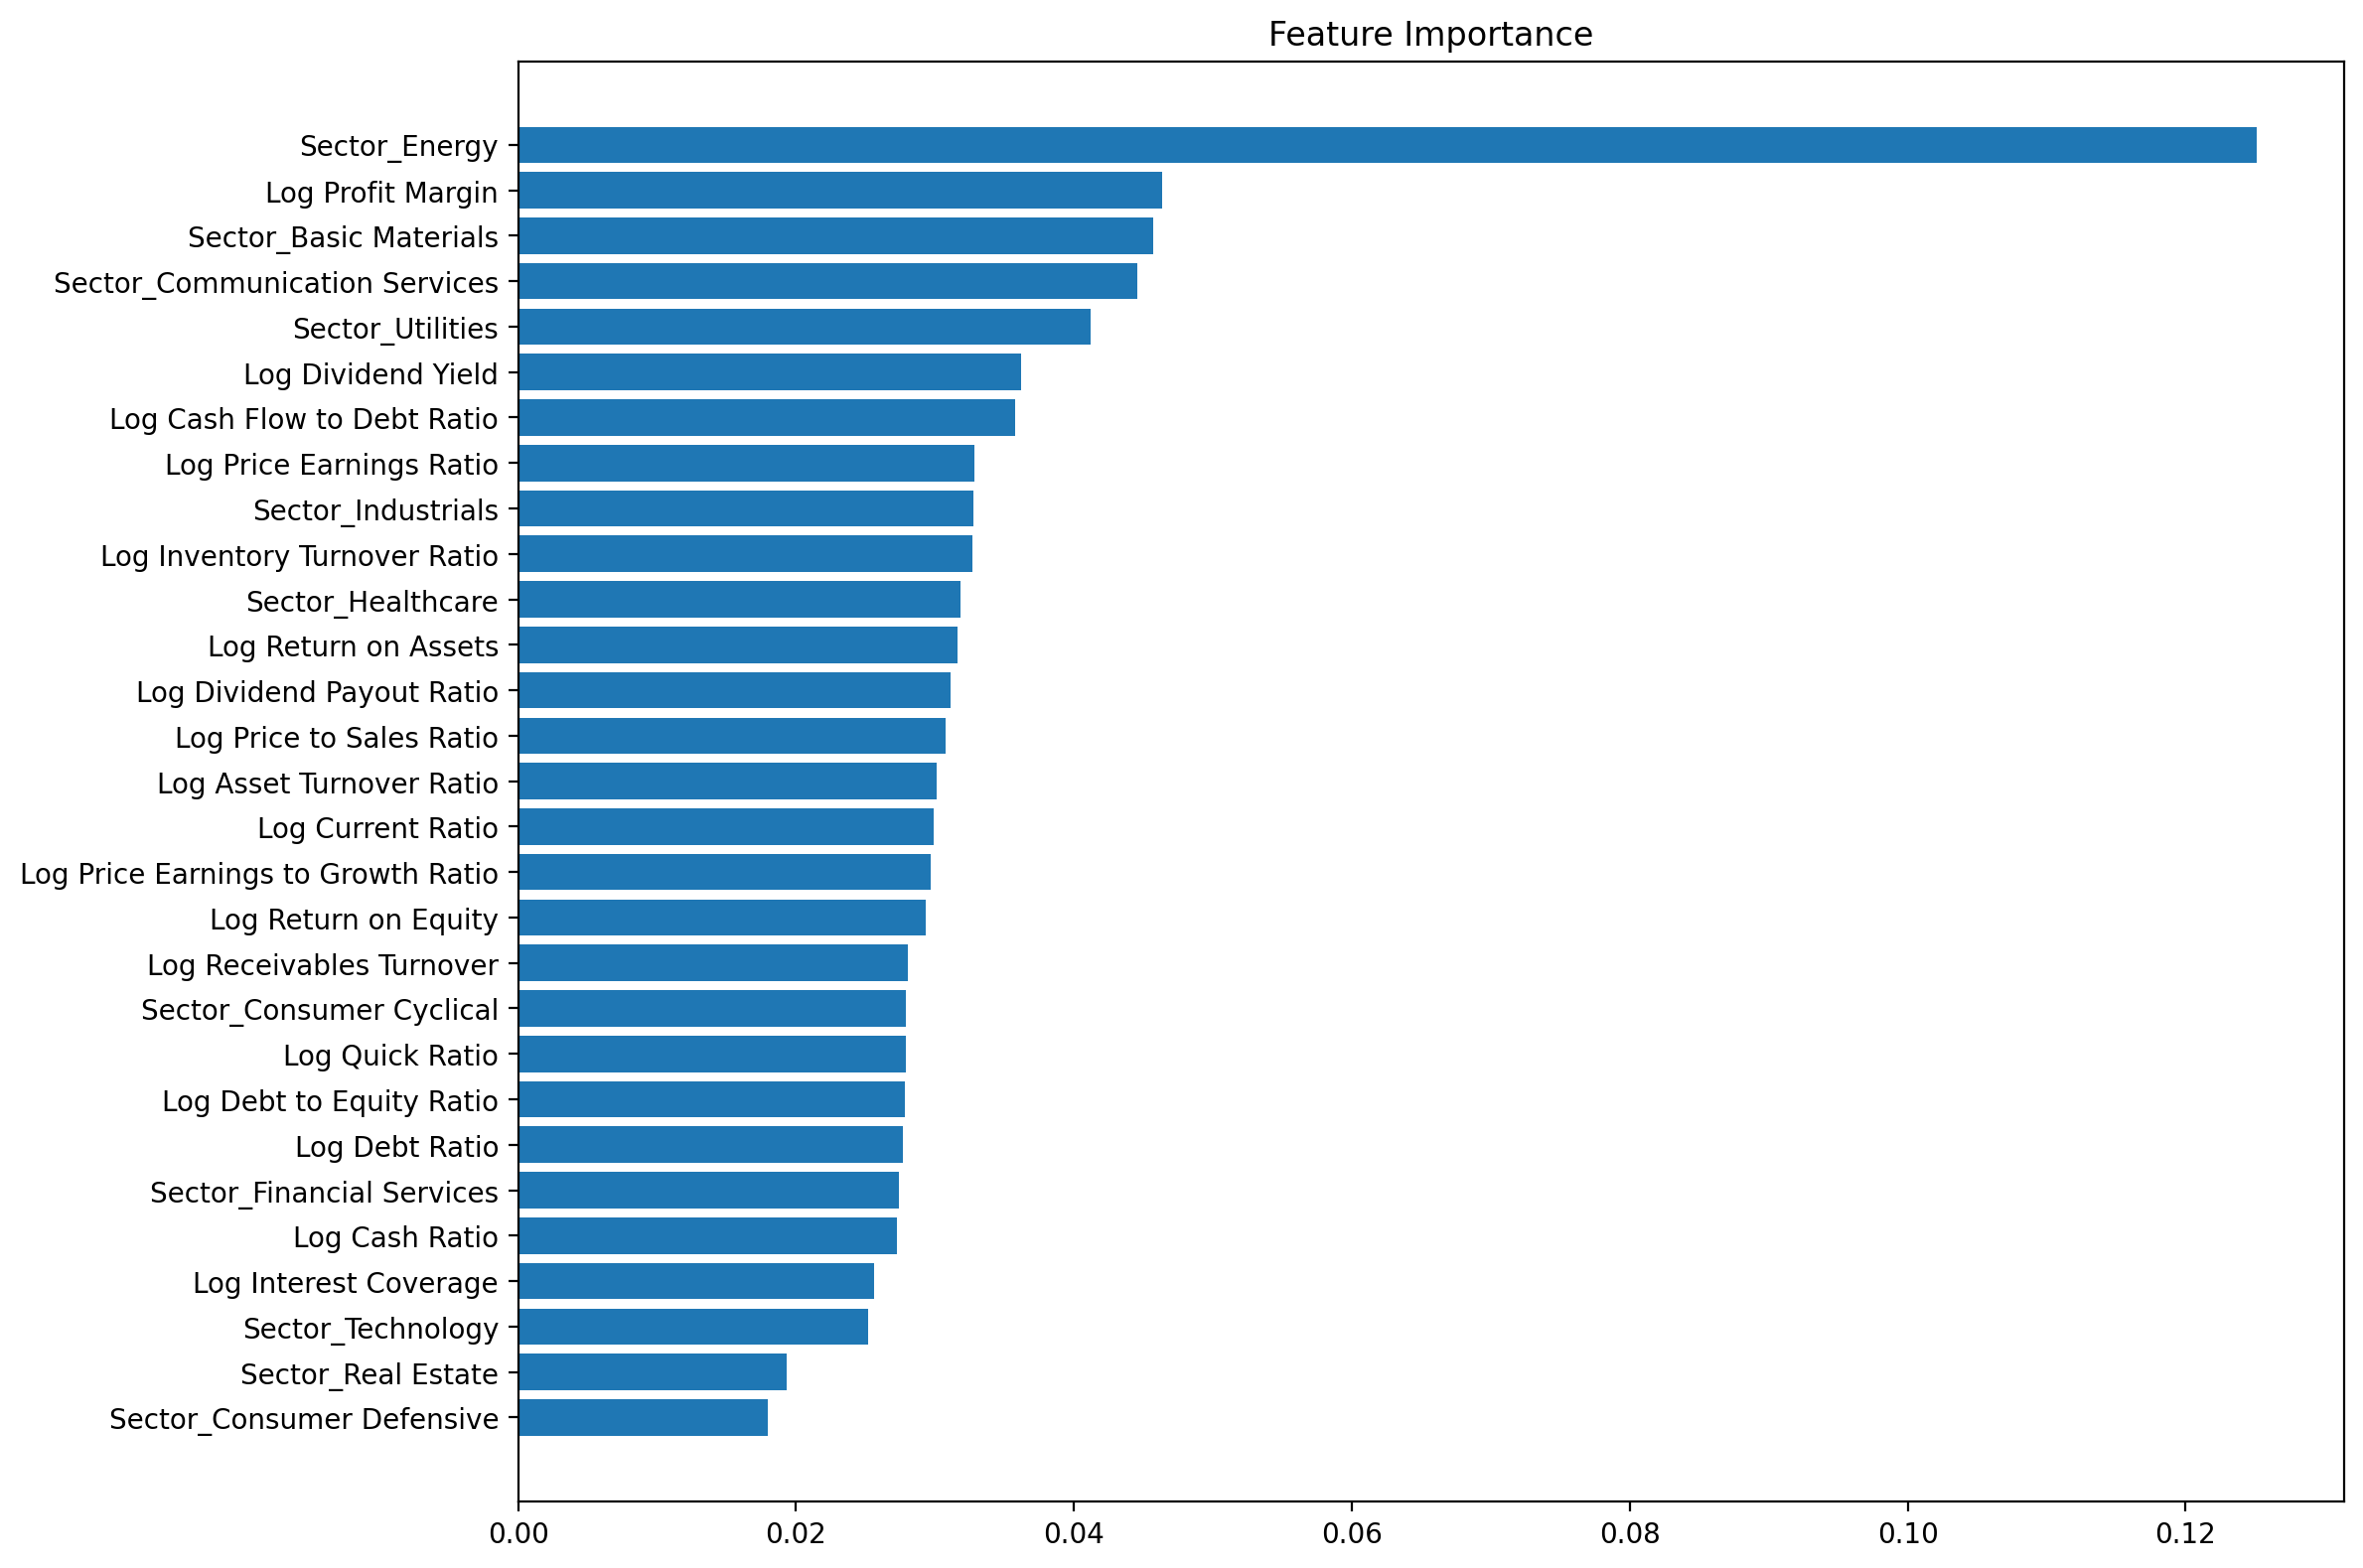

In [71]:
plt.figure(figsize = (12, 8), dpi = 200)
plt.barh(pos, feature_importance[sorted_idx], align = 'center')
plt.yticks(pos, log_X.columns[sorted_idx])

plt.title("Feature Importance")

plt.tight_layout()

plt.show()

## Conclusions

The first step will be to evaluate the best precision score.

In [89]:
scores_dict = None
scores = None

In [91]:
scores_dict = {'Random Forest':rfc_precision_score, 
          'Transformed Random Forest':transformed_rfc_precision_score,
          'Extreme Gradient Boosting':xgb_precision_score,
          'Transformed Gradient Boosting':transformed_xgb_precision_score}

scores = pd.DataFrame(list(scores_dict.items()),  columns = ['Model', 'Precision Score']).set_index('Model')

In [92]:
scores

,Precision Score
Model,
Random Forest,0.618805
Transformed Random Forest,0.619705
Extreme Gradient Boosting,0.625934
Transformed Gradient Boosting,0.620020


Since the extreme gradient boosting, with the regular dataset, had the highest precision score, that will be the model that I will consider to be the best one. 

The issue with the model is that the score, though the max, is only slightly above 60%.  That is a good enough score, but I will now check the predicted results and the test dataset to see further analyze the model.

In [94]:
# Resetting the testing and training data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [95]:
# Resetting the predicted y values
y_pred = xgb.predict(X_test)

In [99]:
# To analyze the testing data I will create a new dataframe containing X_test, y_test, y_pred, and the PRICE VAR [%]
# of the stocks in the testing data.

test = X_test # Creating new dataframe with X_test
test['y_test'] = y_test # Adding y_test to the test dataframe
test['y_pred'] = y_pred # Adding y_pred to the test dataframe

# To add the price variance percentage I will need to use the indicators.  For that, I will first need to
# extract the index of the test dataset to add only the price varience of those stocks.

idx = test.index # Separating the test index

test['PRICE VAR [%]'] = indicators.loc[idx, 'PRICE VAR [%]'] # Adding the price variance percentage to the test dataframe

C:\Users\soccershowmsn\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\soccershowmsn\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\soccershowmsn\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [100]:
test.head()

,,Return on Assets,Return on Equity,Profit Margin,Current Ratio,Quick Ratio,Cash Ratio,Debt Ratio,Debt to Equity Ratio,Interest Coverage,Cash Flow to Debt Ratio,...,Sector_Energy,Sector_Financial Services,Sector_Healthcare,Sector_Industrials,Sector_Real Estate,Sector_Technology,Sector_Utilities,y_test,y_pred,PRICE VAR [%]
Year,Stock,,,,,,,,,,,,,,,,,,,,,
2018,SUPN,0.113512,0.2450,0.2710,3.058431,5.439862,1.191475,0.3369,0.7273,8.7398,0.391505,...,0,0,1,0,0,0,0,0,0,-27.616726
2016,ALO,0.185773,0.2218,0.2560,3.010115,2.377076,1.803503,0.0022,0.0026,13.1644,90.164021,...,0,0,0,0,0,0,0,1,0,11.212125
2015,XLNX,0.132341,0.2482,0.2730,4.085368,3.962369,0.926668,0.3207,0.6015,50.3318,0.515912,...,0,0,0,0,0,1,0,1,1,35.424941
2017,CVTI,0.085334,0.1878,0.0790,1.998449,1.656870,0.189067,0.3291,0.7243,3.8211,0.387526,...,0,0,0,1,0,0,0,0,1,-31.672596
2018,ABEV,0.117127,0.1957,0.0564,1.020191,0.675060,0.461711,0.0257,0.0430,4.3515,8.145746,...,0,0,0,0,0,0,0,1,1,13.886605


Misclassifying the decline class as an invest class means that the model will incorrectly recommend loss of investments.  The recall score for the decline class (0) is at approximately 0.44, which is quite low.  With so many misclassified invest stocks, I want to have an idea of how much loss is the model recommending in the testing dataset.

The first step to investigate the loss in the testing dataset will be to check the distribution of the price variance with from the missclassified invest data only.

In [101]:
# To issolate the missclassified invest dataset, I will need the data where the y_pred is 1 and the price variance
# to be negative, which indicates the loss.

loss = test[(test.y_pred == 1) & (test['PRICE VAR [%]'] < 0)] # Issolating the misclassified invest test dataset

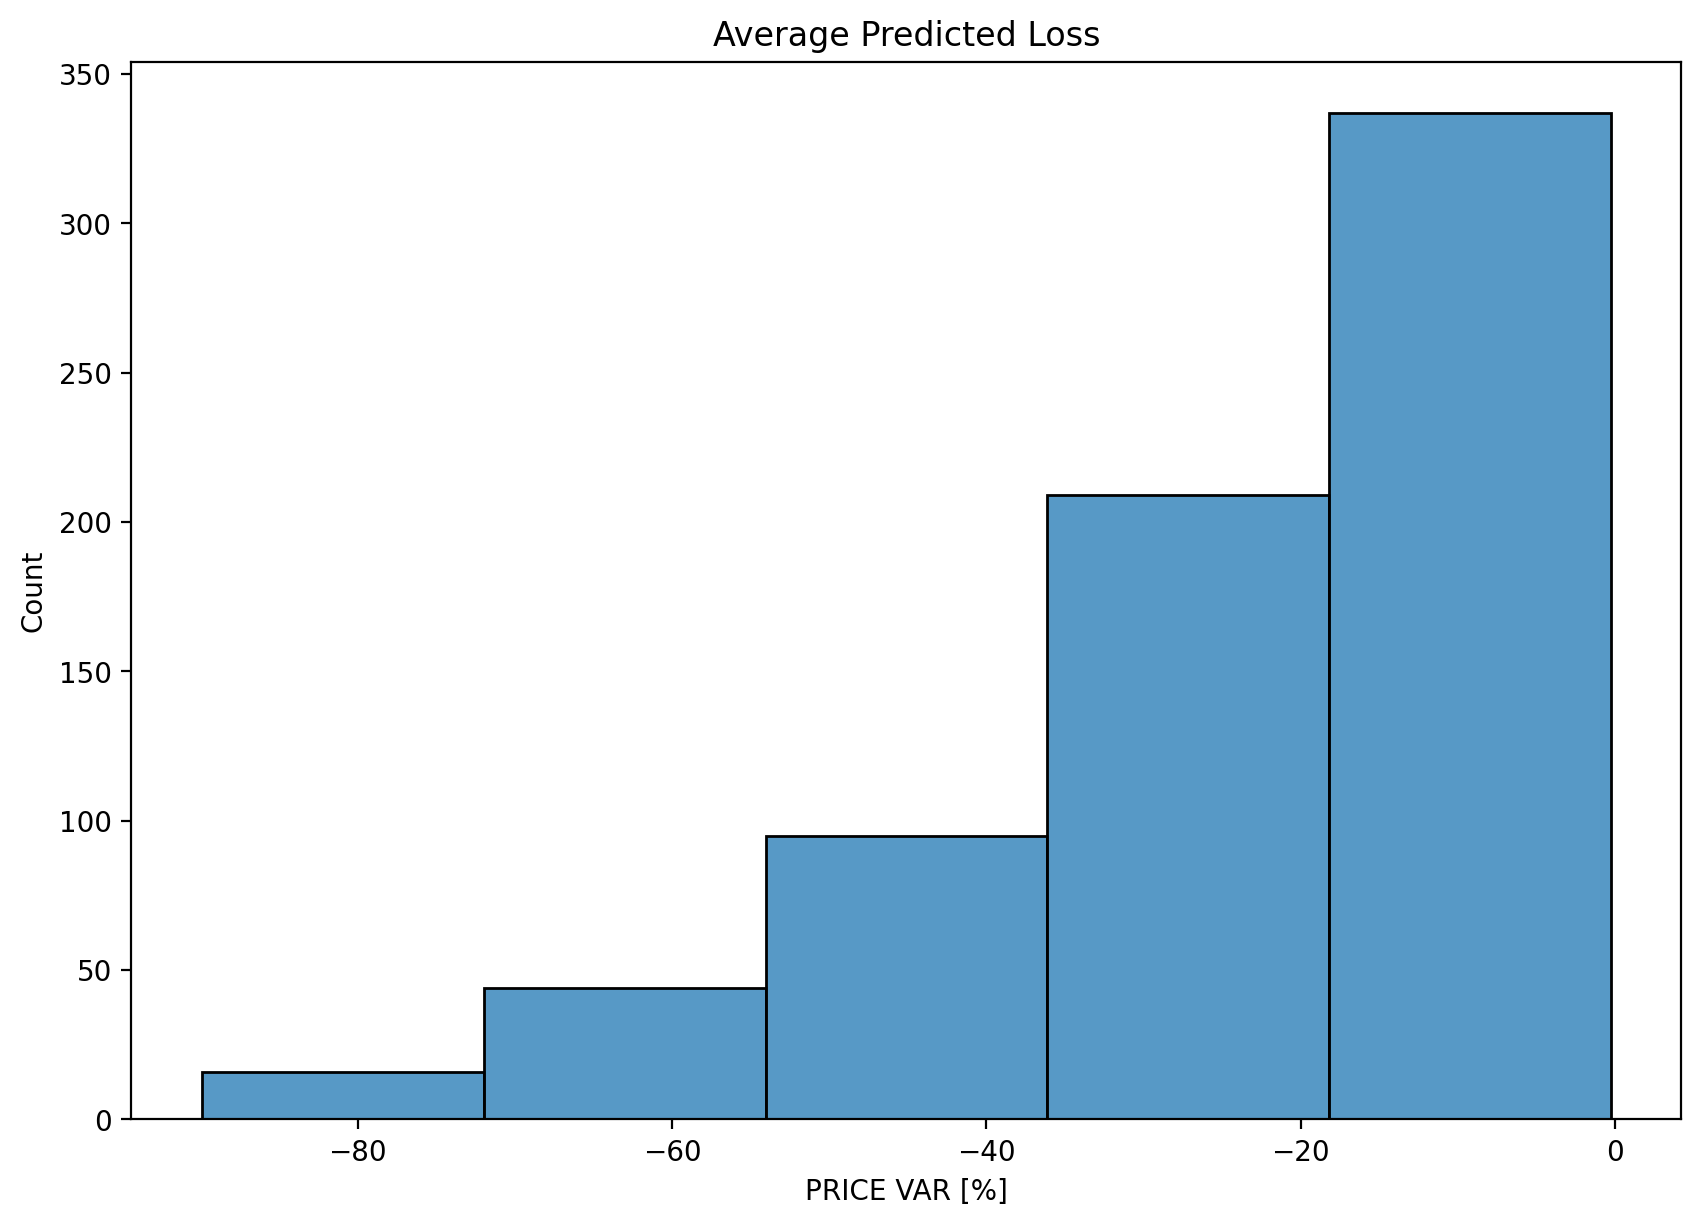

In [103]:
plt.figure(figsize = (10, 7), dpi = 200)

sns.histplot(loss['PRICE VAR [%]'], bins = 5)
plt.title("Average Predicted Loss")

plt.show()

The histogram shows that most of the predicted loss has the price variance above -40%.  That maybe an indication that the model is able to keep losses at a minimum.  In my next part of this analysis I will check and see percentages loss in specific price variance ranges.

In [116]:
# Separating the test data to each difference price variance percentage range

n20 = test[(test['PRICE VAR [%]'] < 0) & (test['PRICE VAR [%]'] >= -20)] # Percent in range 0 to -20
n40 = test[(test['PRICE VAR [%]'] < -20) & (test['PRICE VAR [%]'] >= -40)] # Percent in range -20 to -40
n60 = test[(test['PRICE VAR [%]'] < -40) & (test['PRICE VAR [%]'] >= -60)] # Percent in range -40 to -60
n80 = test[(test['PRICE VAR [%]'] < -60) & (test['PRICE VAR [%]'] >= -80)] # Percent in range -60 to -80
n100 = test[(test['PRICE VAR [%]'] < -80)] # Percent in range -80 and lower

In [117]:
# Counting how there are in each price variance percentage range

count_20 = round((n20[n20.y_pred == 1]['y_pred'].count() / n20.y_pred.count()) * 100, 2) # Percent in range 0 to -20
count_40 = round((n40[n40.y_pred == 1]['y_pred'].count() / n40.y_pred.count()) * 100, 2) # Percent in range -20 to -40
count_60 = round((n60[n60.y_pred == 1]['y_pred'].count() / n60.y_pred.count()) * 100, 2) # Percent in range -40 to -60
count_80 = round((n80[n80.y_pred == 1]['y_pred'].count() / n80.y_pred.count()) * 100, 2) # Percent in range -60 to -80
count_100 = round((n100[n100.y_pred == 1]['y_pred'].count() / n100.y_pred.count()) * 100, 2) # Percent in range -80 and lower

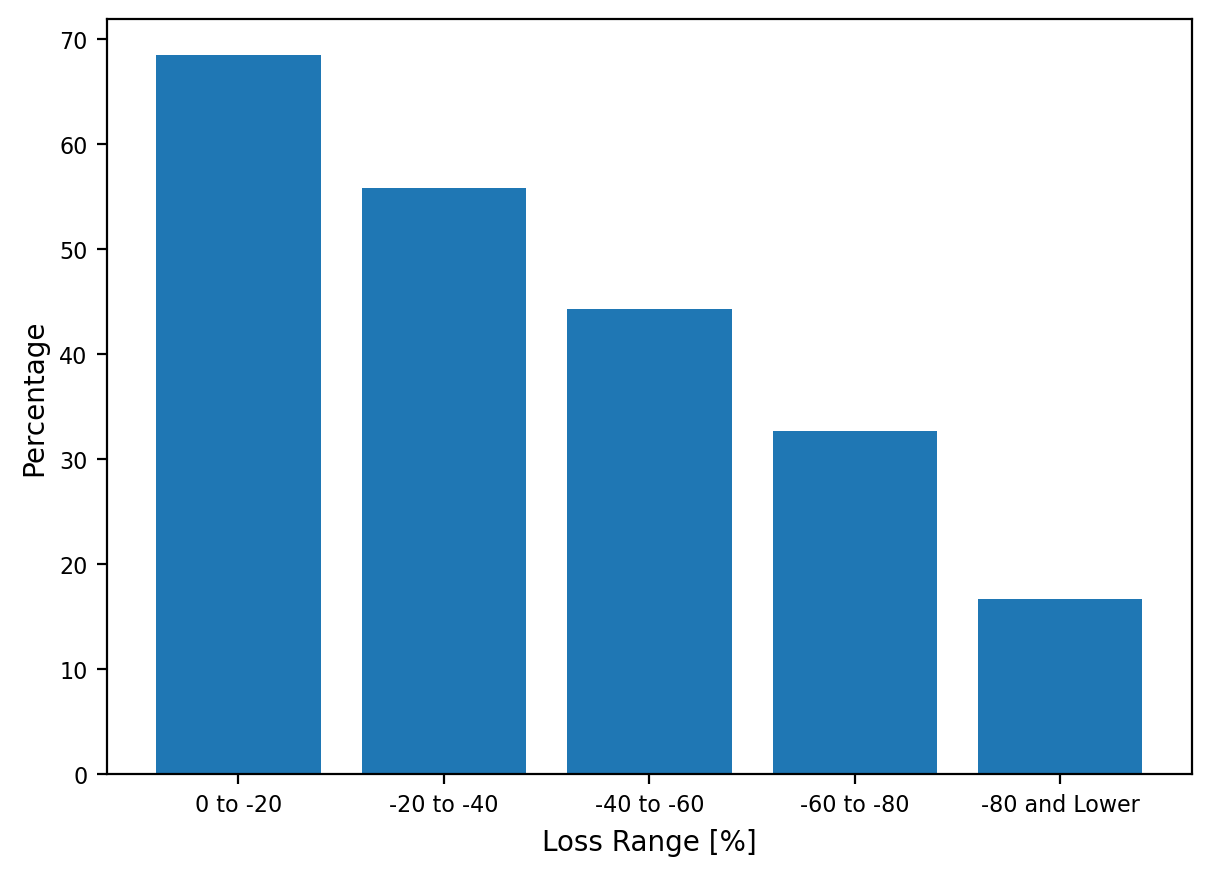

In [132]:
height = [count_20, count_40, count_60, count_80, count_100]
bars = ['0 to -20', '-20 to -40', '-40 to -60', '-60 to -80', '-80 and Lower']

plt.figure(figsize = (7, 5), dpi = 200)

plt.bar(x = bars, height = height)

plt.xlabel("Loss Range [%]", size = 10)
plt.xticks(size = 8)
plt.ylabel('Percentage', size = 10)
plt.yticks(size = 8)

plt.show()

With the amount of stock that wrongly misclassified as invest going dows as the price varience goes down, it indicates that the model is somewhat capable to recognize which stocks would likely have a high loss year.

The last thing I will do is try to compare the average gain and the average loss from the test data.

In [125]:
gain = test[(test['PRICE VAR [%]'] > 0) & (test.y_pred == 1)]

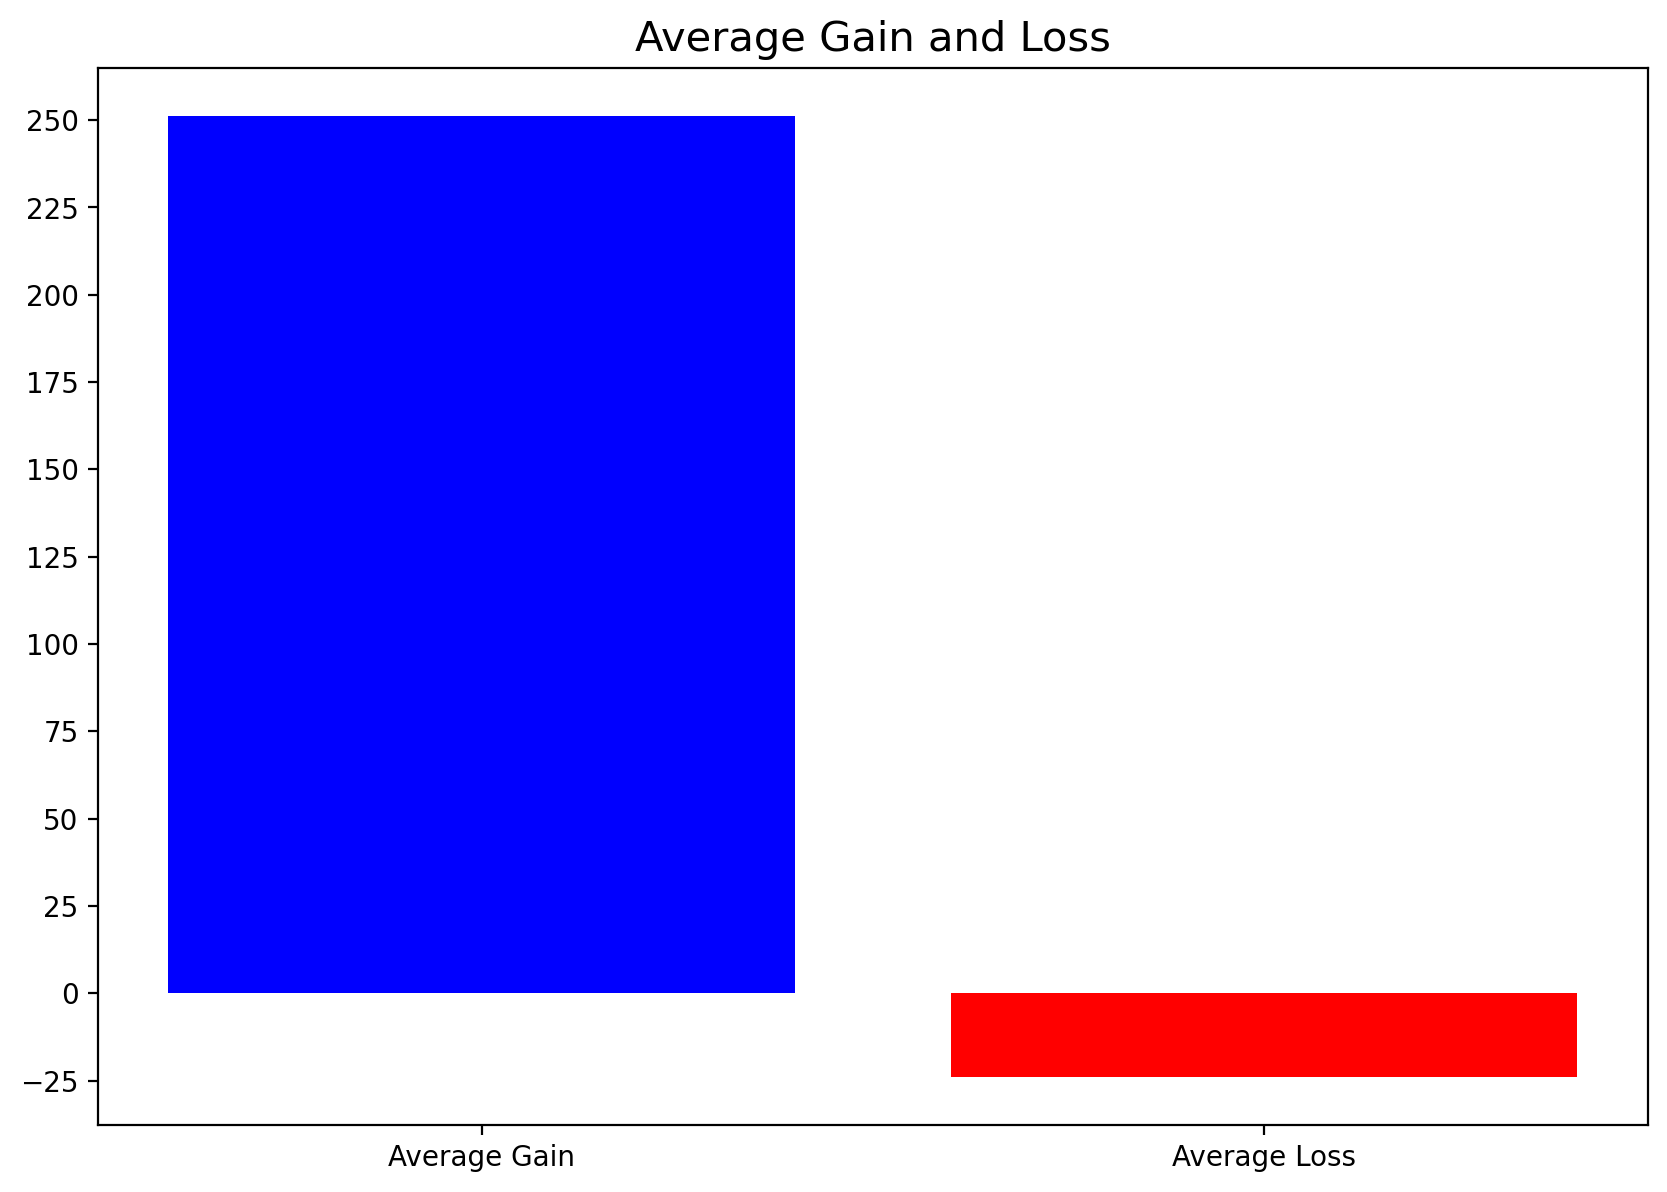

In [130]:
# Setting the gain test dataset
a = round(gain['PRICE VAR [%]'].mean(), 2)

# Setting the loss test dataset
b = round(loss['PRICE VAR [%]'].mean(), 2)

height = [a, b]
bars = ['Average Gain', 'Average Loss']
y_pos = [0, 1]

plt.figure(figsize = (10, 7), dpi = 200)
plt.bar(y_pos, height, color = ['blue', 'red'])

plt.xticks(y_pos, bars)
plt.yticks(np.arange(-25, 255, 25))

plt.title("Average Gain and Loss", size = 15)

plt.show()

The average gains far outweights the average losses for the test dataset.  This indicates that the model is able to keep a high rate of gains while keeping a low rate of loss.

This concludes the machine learning portion of the project.